In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

base_dir = os.getcwd()
# Chemins des sous-dossiers pour train et test
file_path = os.path.join(base_dir,os.pardir,'data', 'processed', 'processed_male_players.csv')

df = pd.read_csv(file_path)

In [3]:
df["Height"] = df["Height"].str.extract(r"(\d+)").astype(int)
df["Weight"] = df["Weight"].str.extract(r"(\d+)").astype(int)
df.to_csv(os.path.join(base_dir,os.pardir,'data', 'processed','processed_male_players.csv'), index=False)

In [14]:
df = df.dropna(subset=["Progression"])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sélection des features (variables explicatives) et de la target (variable cible)
features = [
       'OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY',
       'Weak foot', 'Skill moves','Height','Weight', 'Age'
]
target = "Progression"

X = df[features]
y = df[target]

# Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### training

In [16]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, y_train)

### Model evaluation

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_absolute_error(y_test, y_pred)):.2f}")


Mean squared error: 1.21
Coefficient of determination: 0.97
RMSE: 0.90


### Plot

In [18]:
len(X_test)

3231

In [19]:
len(y_test)

3231

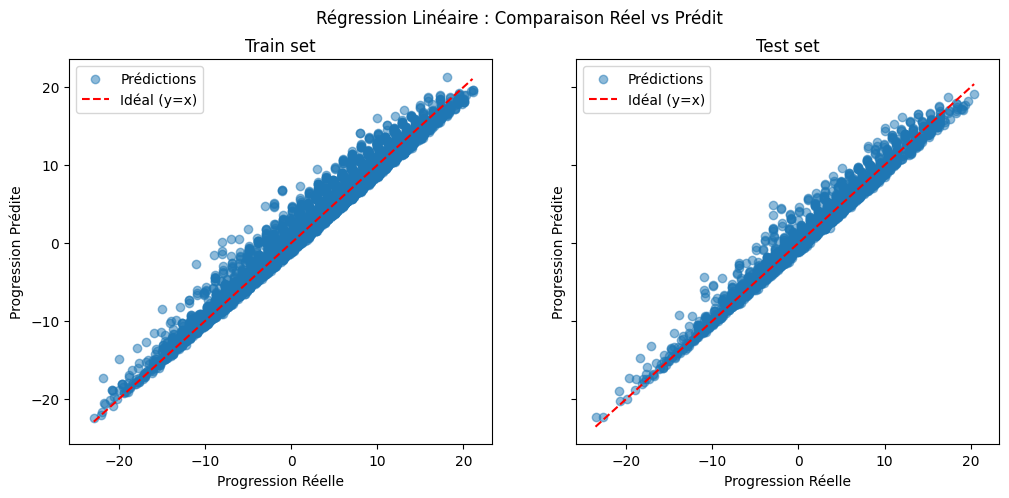

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Trier les valeurs pour une meilleure visualisation
sorted_indices = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sorted_indices]
y_pred_sorted = np.array(y_pred)[sorted_indices]

# Création de la figure avec deux sous-graphiques (train/test)
fig, ax = plt.subplots(ncols=2, figsize=(12, 5), sharex=True, sharey=True)

# Graphique de gauche : données d'entraînement
ax[0].scatter(y_train, regressor.predict(X_train), alpha=0.5, label="Prédictions")
ax[0].plot(
    [min(y_train), max(y_train)], 
    [min(y_train), max(y_train)], 
    color="red", linestyle="--", 
    label="Idéal (y=x)"
)
ax[0].set(xlabel="Progression Réelle", ylabel="Progression Prédite", title="Train set")
ax[0].legend()

# Graphique de droite : données de test
ax[1].scatter(y_test, y_pred, alpha=0.5, label="Prédictions")
ax[1].plot(
    [min(y_test), max(y_test)], 
    [min(y_test), max(y_test)], 
    color="red", linestyle="--", 
    label="Idéal (y=x)"
)
ax[1].set(xlabel="Progression Réelle", ylabel="Progression Prédite", title="Test set")
ax[1].legend()

# Titre global
fig.suptitle("Régression Linéaire : Comparaison Réel vs Prédit")

plt.show()


In [21]:
import pickle

# Sauvegarde du modèle entraîné
with open("regression_model.pkl", "wb") as f:
    pickle.dump(regressor, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [22]:
import numpy as np

# Nouveau joueur à tester
new_player = np.array([[85, 90, 85, 80, 88, 40, 75, 85, 90, 80, 85, 
                        85, 82, 75, 80, 84, 83, 80, 85, 80, 82, 86, 
                        88, 87, 84, 86, 80, 70, 68, 65, 80, 85, 88, 4, 5, 22]])

# Normalisation des données du joueur
new_player_scaled = scaler.transform(new_player)

# Prédiction
predicted_progression = regressor.predict(new_player_scaled)

print(f"✅ Progression Prédite : {predicted_progression[0]:.2f}")


h:\GitHub\Fifa_Scouting\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 36 features, but StandardScaler is expecting 12 features as input.

In [63]:
print(len(features))
print(len(new_player))

39
1


In [67]:
new_player.size

36

In [ ]:
new